In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

import plotly.express as ex
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly
from datetime import datetime
pyo.init_notebook_mode()
plotly.io.orca.config.save()
import os

if not os.path.exists("images"):
    os.mkdir("images")

import warnings
warnings.filterwarnings('ignore')

import os

In [2]:
daily = pd.read_csv('dailysumary.csv')
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117064 entries, 0 to 117063
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     117064 non-null  object 
 1   country                  117064 non-null  object 
 2   cumulative_total_cases   117064 non-null  float64
 3   daily_new_cases          110191 non-null  float64
 4   active_cases             116532 non-null  float64
 5   cumulative_total_deaths  110148 non-null  float64
 6   daily_new_deaths         96221 non-null   float64
dtypes: float64(5), object(2)
memory usage: 6.3+ MB


In [3]:
daily['date'] = pd.to_datetime(daily['date'])

In [4]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117064 entries, 0 to 117063
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     117064 non-null  datetime64[ns]
 1   country                  117064 non-null  object        
 2   cumulative_total_cases   117064 non-null  float64       
 3   daily_new_cases          110191 non-null  float64       
 4   active_cases             116532 non-null  float64       
 5   cumulative_total_deaths  110148 non-null  float64       
 6   daily_new_deaths         96221 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 6.3+ MB


In [5]:
daily.head()

date      country  cumulative_total_cases  daily_new_cases  \
0 2020-02-15  Afghanistan                     0.0              NaN   
1 2020-02-16  Afghanistan                     0.0              NaN   
2 2020-02-17  Afghanistan                     0.0              NaN   
3 2020-02-18  Afghanistan                     0.0              NaN   
4 2020-02-19  Afghanistan                     0.0              NaN   

   active_cases  cumulative_total_deaths  daily_new_deaths  
0           0.0                      0.0               NaN  
1           0.0                      0.0               NaN  
2           0.0                      0.0               NaN  
3           0.0                      0.0               NaN  
4           0.0                      0.0               NaN

In [6]:
summary = pd.read_csv('sumary1.csv')
summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         220 non-null    object 
 1   continent                       220 non-null    object 
 2   total_confirmed                 220 non-null    int64  
 3   total_deaths                    207 non-null    float64
 4   total_recovered                 219 non-null    float64
 5   active_cases                    219 non-null    float64
 6   serious_or_critical             146 non-null    float64
 7   total_cases_per_1m_population   220 non-null    int64  
 8   total_deaths_per_1m_population  204 non-null    float64
 9   total_tests                     210 non-null    float64
 10  total_tests_per_1m_population   210 non-null    float64
 11  population                      220 non-null    int64  
dtypes: float64(7), int64(3), object(2)
m

In [7]:
df = pd.read_csv("country_vaccinations.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38644 entries, 0 to 38643
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              38644 non-null  object 
 1   iso_code                             38644 non-null  object 
 2   date                                 38644 non-null  object 
 3   total_vaccinations                   21254 non-null  float64
 4   people_vaccinated                    20314 non-null  float64
 5   people_fully_vaccinated              17437 non-null  float64
 6   daily_vaccinations_raw               17461 non-null  float64
 7   daily_vaccinations                   38393 non-null  float64
 8   total_vaccinations_per_hundred       21254 non-null  float64
 9   people_vaccinated_per_hundred        20314 non-null  float64
 10  people_fully_vaccinated_per_hundred  17437 non-null  float64
 11  daily_vaccinations_per_milli

In [8]:
df['date'] = pd.to_datetime(df['date'])
df.drop(columns= ['source_name', 'source_website'])

country iso_code       date  total_vaccinations  people_vaccinated  \
0      Afghanistan      AFG 2021-02-22                 0.0                0.0   
1      Afghanistan      AFG 2021-02-23                 NaN                NaN   
2      Afghanistan      AFG 2021-02-24                 NaN                NaN   
3      Afghanistan      AFG 2021-02-25                 NaN                NaN   
4      Afghanistan      AFG 2021-02-26                 NaN                NaN   
...            ...      ...        ...                 ...                ...   
38639     Zimbabwe      ZWE 2021-08-14           3234909.0          2036008.0   
38640     Zimbabwe      ZWE 2021-08-15           3289258.0          2064023.0   
38641     Zimbabwe      ZWE 2021-08-16           3345985.0          2091259.0   
38642     Zimbabwe      ZWE 2021-08-17           3450959.0          2145237.0   
38643     Zimbabwe      ZWE 2021-08-18           3542340.0          2193046.0   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                          NaN                     NaN                 NaN   
1                          NaN                     NaN              1367.0   
2                          NaN                     NaN              1367.0   
3                          NaN                     NaN              1367.0   
4                          NaN                     NaN              1367.0   
...                        ...                     ...                 ...   
38639                1198901.0                     NaN             54502.0   
38640                1225235.0                 54349.0             57530.0   
38641                1254726.0                 56727.0             57782.0   
38642                1305722.0                104974.0             68200.0   
38643                1349294.0                 91381.0             75000.0   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                                0.00                           0.00   
1                                 NaN                            NaN   
2                                 NaN                            NaN   
3                                 NaN                            NaN   
4                                 NaN                            NaN   
...                               ...                            ...   
38639                           21.76                          13.70   
38640                           22.13                          13.89   
38641                           22.51                          14.07   
38642                           23.22                          14.43   
38643                           23.83                          14.76   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                      NaN                             NaN   
1                                      NaN                            35.0   
2                                      NaN                            35.0   
3                                      NaN                            35.0   
4                                      NaN                            35.0   
...                                    ...                             ...   
38639                                 8.07                          3667.0   
38640                                 8.24                          3871.0   
38641                                 8.44                          3888.0   
38642                                 8.79                          4589.0   
38643                                 9.08                          5046.0   

                                                vaccines  
0      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
1      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
2      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
3      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
4   

In [9]:
def to_dataframe(df, col):
    
    data = df.groupby('country')[col].max()
    data = pd.DataFrame(data)
    
    return data

columns_to_join = ['people_vaccinated', 
                   'people_fully_vaccinated',
                   'total_vaccinations_per_hundred', 
                   'people_vaccinated_per_hundred',
                   'people_fully_vaccinated_per_hundred',
                   'vaccines']

df_country = pd.DataFrame(df.groupby(['country'])['total_vaccinations'].max())

for col in columns_to_join:
    df_country = df_country.join(to_dataframe(df, col))

df_country = df_country.reset_index()

df_country.loc[df_country['people_vaccinated_per_hundred'] > 100, 'people_vaccinated_per_hundred'] = 100
df_country.loc[df_country['people_fully_vaccinated_per_hundred'] > 100, 'people_fully_vaccinated_per_hundred'] = 100

In [10]:
df_vaccines = pd.DataFrame(columns= ['vaccine', 'country']) 

i = 0
for row in df_country['vaccines']:
    vaccines = row.split(', ')
    for v in vaccines:
        new_row = {'vaccine' : v, 'country' : df_country['country'][i]}
        df_vaccines = df_vaccines.append(new_row, ignore_index= True)
        
    i += 1

In [11]:
df_country.to_csv('Country.csv')
df.to_csv('vaccination.csv')

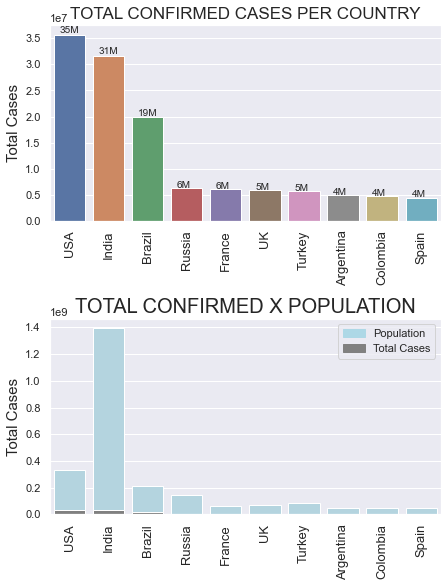

In [12]:
plt.figure(figsize= (7, 9))
sns.set_theme()

plt.subplot(2, 1, 1)
ax = sns.barplot(x= summary['country'], 
            y= summary['total_confirmed'],
            order= summary.sort_values('total_confirmed', ascending= False)['country'][:10],
            )
plt.title('TOTAL CONFIRMED CASES PER COUNTRY', size= 17)
plt.xlabel('')
plt.ylabel('Total Cases', size= 15)
plt.xticks(rotation= 90, size= 13)

for patch in ax.patches:
    width = patch.get_width() 
    height= patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(x + 0.15, y + height * 1.01, '{}M'.format(int(height/1000000)), size= 10)

plt.subplot(2, 1, 2)
ax = sns.barplot(x= summary['country'], 
            y= summary['population'],
            order= summary.sort_values('total_confirmed', ascending= False)['country'][:10], 
            color= 'lightblue')


sns.barplot(x= summary['country'], 
            y= summary['total_confirmed'],
            order= summary.sort_values('total_confirmed', ascending= False)['country'][:10], 
            color= 'gray')

plt.title('TOTAL CONFIRMED X POPULATION', size= 20)
plt.xlabel('')
plt.ylabel('Total Cases', size= 15)
plt.xticks(rotation= 90, size= 13)

population_patch = mpatches.Patch(color='lightblue', label='Population')
cases_patch = mpatches.Patch(color='gray', label='Total Cases')
plt.legend(handles=[population_patch, cases_patch])

plt.subplots_adjust(hspace=0.5)

plt.show()

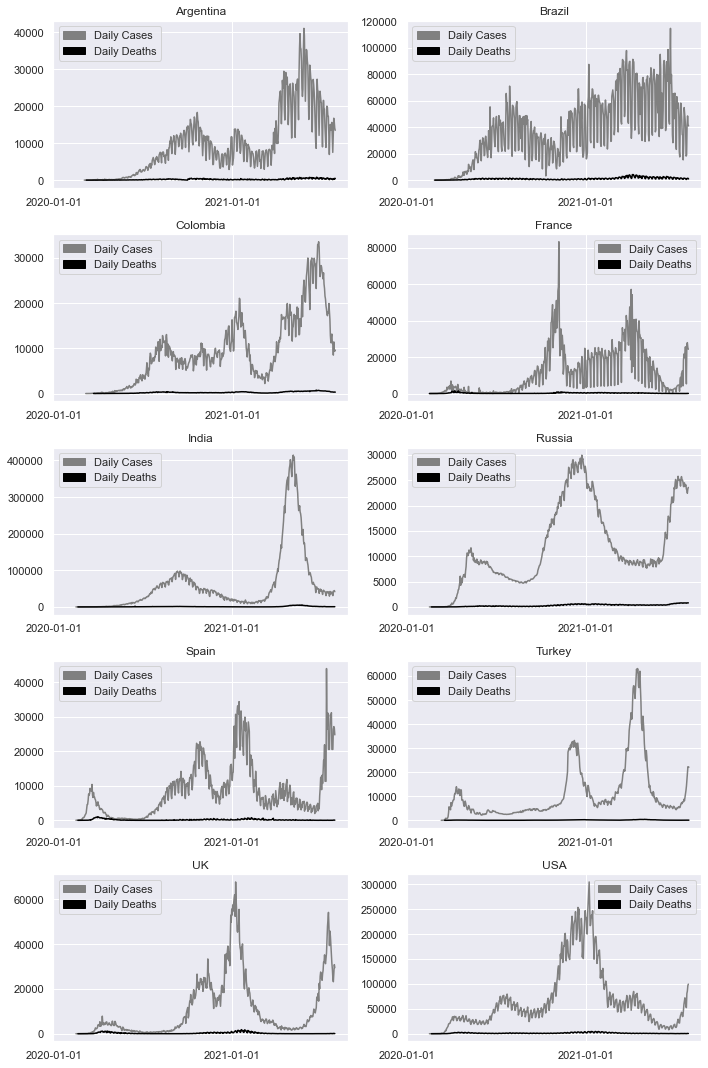

In [13]:
top_countries = daily.loc[daily['country'].isin(summary.sort_values('total_confirmed', ascending= False).reset_index()['country'][:10])]

plt.figure(figsize= (10, 15))

i = 1
for country in top_countries['country'].unique():
    
    data = top_countries.loc[top_countries['country'] == country]
    
    plt.subplot(5, 2, i)
    sns.lineplot(x = data['date'],
                y = data['daily_new_cases'],
                color= 'gray')


    sns.lineplot(x = data['date'],
                y = data['daily_new_deaths'],
                color= 'black')
    
    plt.title(str(country))
    plt.xticks(['2020', '2021'])
    plt.ylabel('')
    plt.xlabel('')
    
    i += 1

    cases_patch = mpatches.Patch(color='gray', label='Daily Cases')
    deaths_patch = mpatches.Patch(color='black', label='Daily Deaths')
    plt.legend(handles=[cases_patch, deaths_patch])
    
plt.tight_layout()
plt.show()

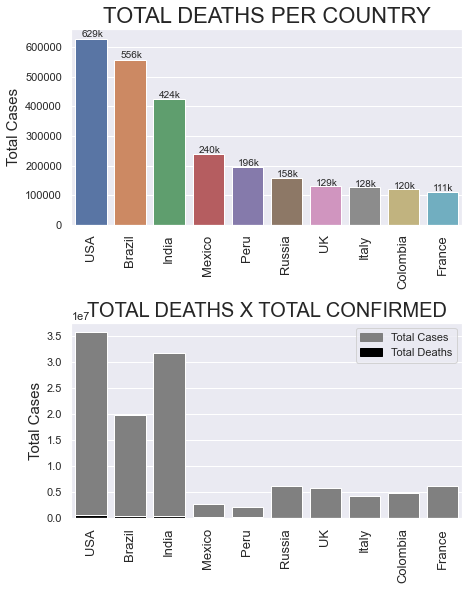

In [14]:
plt.figure(figsize= (7, 9))

plt.subplot(2, 1, 1)
ax = sns.barplot(x= summary['country'], 
            y= summary['total_deaths'],
            order= summary.sort_values('total_deaths', ascending= False)['country'][:10],
            )
plt.title('TOTAL DEATHS PER COUNTRY', size= 22)
plt.xlabel('')
plt.ylabel('Total Cases', size= 15)
plt.xticks(rotation= 90, size= 13)


for patch in ax.patches:
    width = patch.get_width() 
    height= patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    
    plt.text(x + 0.15, y + height * 1.01, '{}k'.format(int(height/1000)), size= 10)

plt.subplot(2, 1, 2)
sns.barplot(x= summary['country'], 
            y= summary['total_confirmed'],
            order= summary.sort_values('total_deaths', ascending= False)['country'][:10], 
            color= 'gray')
   
sns.barplot(x= summary['country'], 
            y= summary['total_deaths'],
            order= summary.sort_values('total_deaths', ascending= False)['country'][:10], 
            color= 'black')

plt.title('TOTAL DEATHS X TOTAL CONFIRMED', size= 20)
plt.xlabel('')
plt.ylabel('Total Cases', size= 15)
plt.xticks(rotation= 90, size= 13)

    
cases_patch = mpatches.Patch(color='gray', label='Total Cases')
deaths_patch = mpatches.Patch(color='black', label='Total Deaths')
plt.legend(handles=[cases_patch, deaths_patch])
plt.subplots_adjust(hspace=0.5)

plt.show()

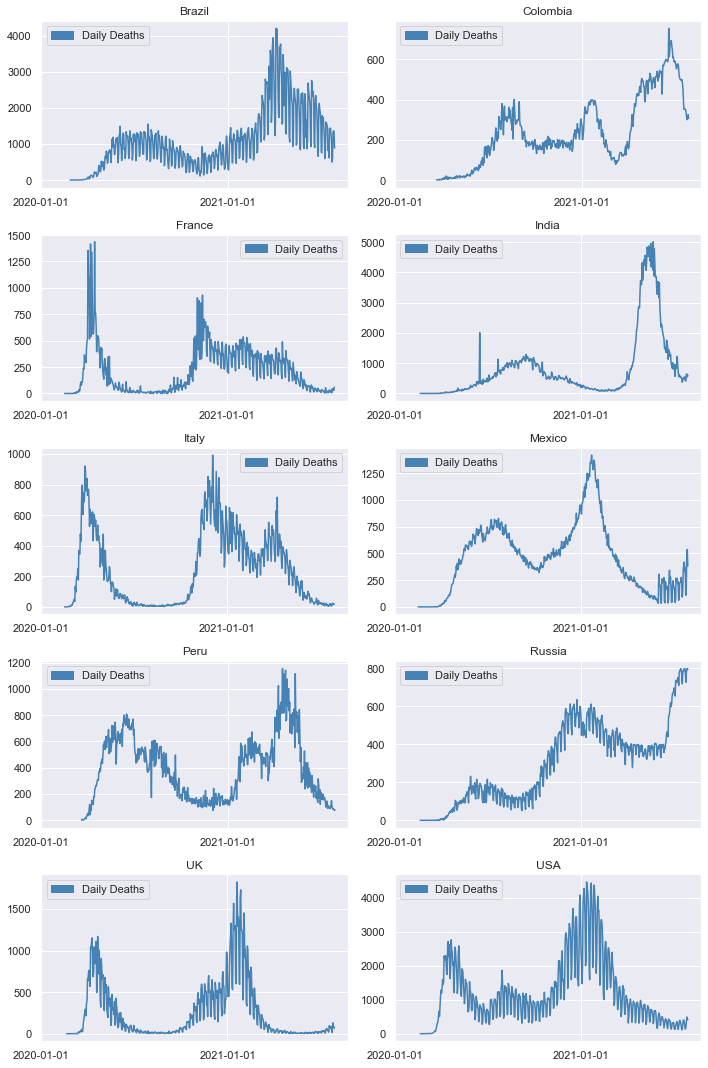

In [15]:
top_countries = daily.loc[daily['country'].isin(summary.sort_values('total_deaths', ascending= False).reset_index()['country'][:10])]

plt.figure(figsize= (10, 15))

i = 1
for country in top_countries['country'].unique():
    
    data = top_countries.loc[top_countries['country'] == country]
    
    plt.subplot(5, 2, i)
    sns.lineplot(x = data['date'],
                y = data['daily_new_deaths'],
                color= 'steelblue')
    
    plt.title(str(country))
    plt.xticks(['2020', '2021'])
    plt.ylabel('')
    plt.xlabel('')
    
    i += 1

    deaths_patch = mpatches.Patch(color='steelblue', label='Daily Deaths')
    plt.legend(handles=[deaths_patch])
    
plt.tight_layout()
plt.show()

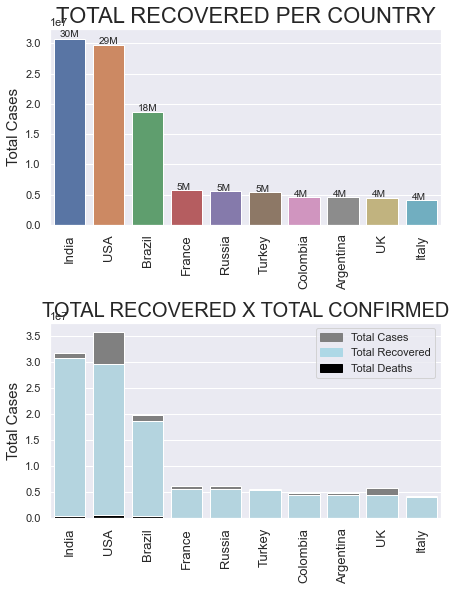

In [16]:
plt.figure(figsize= (7, 9))

plt.subplot(2, 1, 1)
ax = sns.barplot(x= summary['country'], 
            y= summary['total_recovered'],
            order= summary.sort_values('total_recovered', ascending= False)['country'][:10],
            )
plt.title('TOTAL RECOVERED PER COUNTRY', size= 22)
plt.xlabel('')
plt.ylabel('Total Cases', size= 15)
plt.xticks(rotation= 90, size= 13)

for patch in ax.patches:
    width = patch.get_width() 
    height= patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(x + 0.15, y + height * 1.01, '{}M'.format(int(height/1000000)), size= 10)

plt.subplot(2, 1, 2)
sns.barplot(x= summary['country'], 
            y= summary['total_confirmed'],
            order= summary.sort_values('total_recovered', ascending= False)['country'][:10], 
            color= 'gray')
   
sns.barplot(x= summary['country'], 
            y= summary['total_recovered'],
            order= summary.sort_values('total_recovered', ascending= False)['country'][:10], 
            color= 'lightblue')

sns.barplot(x= summary['country'], 
            y= summary['total_deaths'],
            order= summary.sort_values('total_recovered', ascending= False)['country'][:10], 
            color= 'black')

plt.title('TOTAL RECOVERED X TOTAL CONFIRMED', size= 20)
plt.xlabel('')
plt.ylabel('Total Cases', size= 15)
plt.xticks(rotation= 90, size= 13)

    
cases_patch = mpatches.Patch(color='gray', label='Total Cases')
recovered_patch = mpatches.Patch(color='lightblue', label='Total Recovered')
deaths_patch = mpatches.Patch(color='black', label='Total Deaths')
plt.legend(handles=[cases_patch, recovered_patch, deaths_patch])
plt.subplots_adjust(hspace=0.5)

    
plt.show()

In [17]:
title = 'Percentage of the Vaccinated Population per Country'
fig = ex.choropleth(df_country, locations="country", 
                    locationmode='country names',
                    color="people_vaccinated_per_hundred", 
                    hover_name="country", 
                    title='Percentage of the Vaccinated Population',
                    color_continuous_scale= ex.colors.sequential.RdBu,
                    width= 800,
                    height= 400
                   )

fig.update_layout(title=title, 
                  title_x= 0.5)
fig.show()

In [18]:
title = 'Used Vaccines Distribuition'
fig = ex.choropleth(df_vaccines, locations="country", 
                    locationmode='country names',
                    color="vaccine",
                    facet_col = 'vaccine',
                    facet_col_wrap = 4,
                    facet_col_spacing = 0.002,
                    title='Used Vaccines Distribuition',
                    color_continuous_scale= ex.colors.sequential.RdBu,
                    width= 1200,
                    height= 800
                   )

fig.update_layout(title=title, 
                  title_x= 0.5)

fig.show()

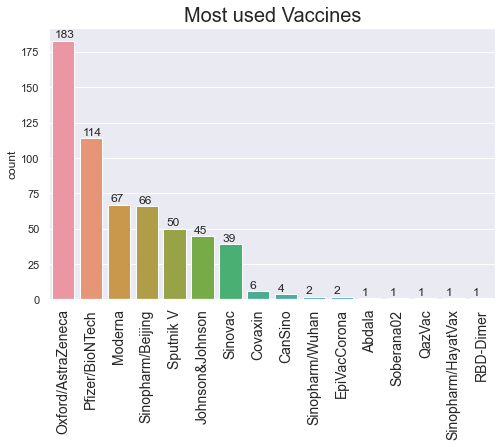

In [19]:
sns.set_theme()
plt.figure(figsize= (8, 5))
ax = sns.countplot(df_vaccines['vaccine'], order= df_vaccines['vaccine'].value_counts().index)

plt.title('Most used Vaccines', size= 20)
plt.xlabel(None)
plt.xticks(rotation= 90, size= 14)

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(x + 0.1, y + height + 2, '{}'.format(height))
    
plt.show()

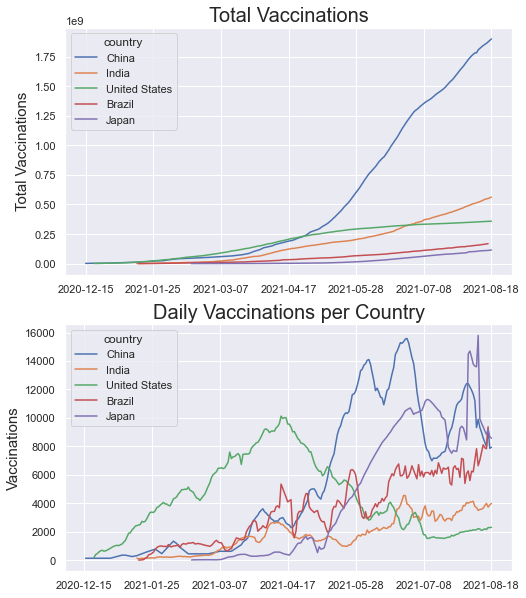

In [20]:
countries = df.groupby('country')['total_vaccinations'].max().sort_values(ascending= False)[:5].index

top_countries = pd.DataFrame(columns= df.columns)
for country in countries:
    top_countries = top_countries.append(df.loc[df['country'] == country])


plt.figure(figsize= (8, 10))
sns.set_theme()
plt.subplot(2, 1, 1)
sns.lineplot(x= top_countries['date'].dt.strftime('%Y-%m-%d'), y= top_countries['total_vaccinations'], hue= top_countries['country'], ci= False)

plt.title('Total Vaccinations', size= 20)
plt.xlabel(None)
plt.ylabel('Total Vaccinations', size= 15)

locs, labels = plt.xticks()
plt.xticks(ticks= range(0,len(labels), len(labels)//6))

plt.subplot(2, 1, 2)
sns.lineplot(top_countries['date'].dt.strftime('%Y-%m-%d'), 
             top_countries['daily_vaccinations_per_million'], 
             hue= top_countries['country'], ci= False)
plt.title('Daily Vaccinations per Country', size= 20)
plt.xlabel(None)
plt.ylabel('Vaccinations', size= 15)
locs, labels = plt.xticks()
plt.xticks(ticks= range(0,len(labels), len(labels)//6))

plt.show()

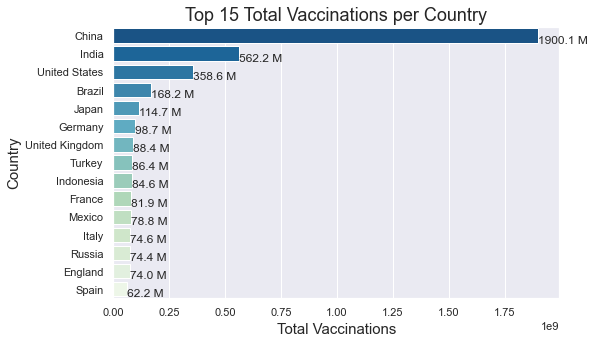

In [21]:
plt.figure(figsize= (8, 5))


ax = sns.barplot(data= df_country, x= 'total_vaccinations', y= 'country',
            order= df_country.sort_values('total_vaccinations', ascending= False)['country'][:15],
            palette= 'GnBu_r')

plt.title('Top 15 Total Vaccinations per Country', size= 18)
plt.xlabel('Total Vaccinations', size= 15)
plt.ylabel('Country', size=15)

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()


    
    plt.text(width + x, height + y, '{:.1f} M'.format(int(width)/1000000))


plt.show()

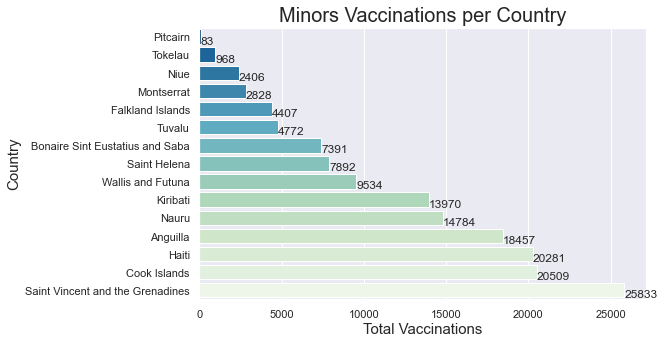

In [22]:
plt.figure(figsize= (8, 5))


ax = sns.barplot(data= df_country, x= 'total_vaccinations', y= 'country',
           order= df_country.sort_values('total_vaccinations')['country'][:15],
            palette= 'GnBu_r')

plt.title('Minors Vaccinations per Country', size= 20)
plt.xlabel('Total Vaccinations', size= 15)
plt.ylabel('Country', size= 15)

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{}'.format(int(width)))

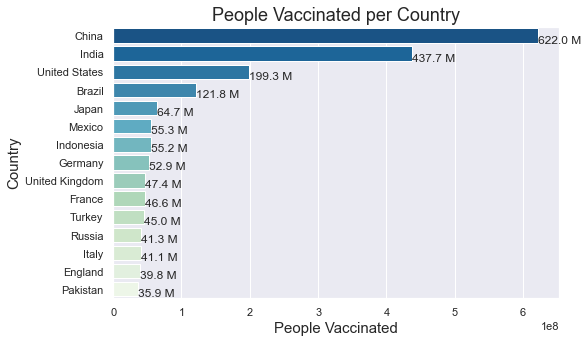

In [23]:
plt.figure(figsize= (8, 5))


ax = sns.barplot(data= df_country, y= 'country', x= 'people_vaccinated',
                order= df_country.sort_values('people_vaccinated', ascending= False)['country'][:15],
                palette= 'GnBu_r')

plt.title('People Vaccinated per Country', size= 18)
plt.xlabel('People Vaccinated', size= 15)
plt.ylabel('Country', size= 15)

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} M'.format(int(width)/1000000))

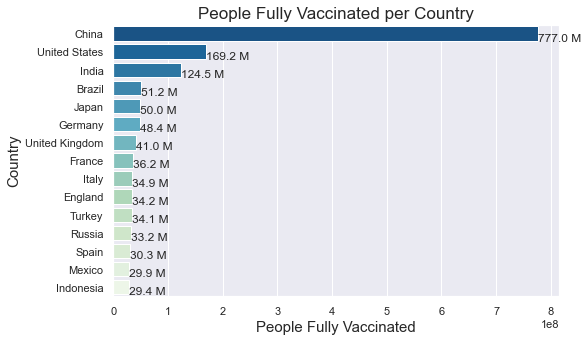

In [24]:
plt.figure(figsize= (8, 5))


ax = sns.barplot(data= df_country, y= 'country', x= 'people_fully_vaccinated',
                order= df_country.sort_values('people_fully_vaccinated', ascending= False)['country'][:15],
                palette= 'GnBu_r')

plt.title('People Fully Vaccinated per Country', size= 17)
plt.xlabel('People Fully Vaccinated', size= 15)
plt.ylabel('Country', size= 15)

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} M'.format(int(width)/1000000))

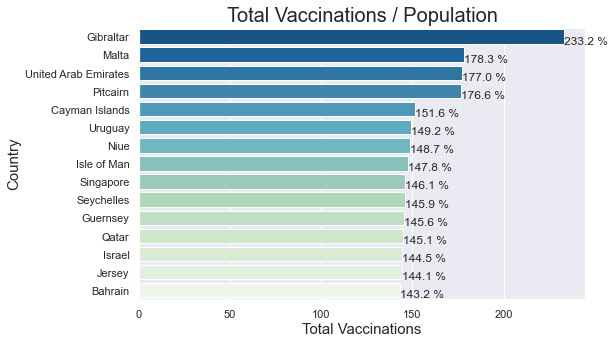

In [25]:
plt.figure(figsize= (8, 5))


ax = sns.barplot(data= df_country, y= 'country', x= 'total_vaccinations_per_hundred',
                order= df_country.sort_values('total_vaccinations_per_hundred', ascending= False)['country'][:15],
                palette= 'GnBu_r')

plt.title('Total Vaccinations / Population', size= 20)
plt.xlabel('Total Vaccinations', size= 15)
plt.ylabel('Country', size= 15)

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} %'.format(width))

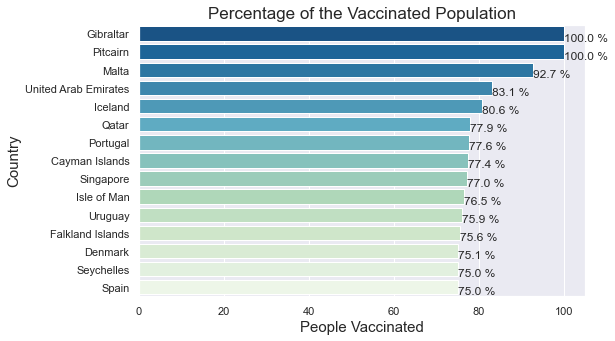

In [26]:
plt.figure(figsize= (8, 5))


ax = sns.barplot(data= df_country, y= 'country', x= 'people_vaccinated_per_hundred',
                order= df_country.sort_values('people_vaccinated_per_hundred', ascending= False)['country'][:15],
                palette= 'GnBu_r')

plt.title('Percentage of the Vaccinated Population', size= 17)
plt.xlabel('People Vaccinated', size= 15)
plt.ylabel('Country', size= 15)

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} %'.format(width))